<a href="https://colab.research.google.com/github/veronica1013/Titanic_Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Analysis

### 1.0 Defining the Question

### a.) Specifying the Question

Using K-nearest neighbor (kNN) classifier and Naive Bayes classifier to create a model that predicts which passengers survived the Titanic shipwreck.

### b.) Defining the Metric for Success

1. Computing the accuracy (percentage of correct classification).
2. Reporting the confusion matrix of each classifier.
3. Applying at least one of the optimization techniques.
4. Providing recommendations to improve both classifiers (K-nearest neighbor (kNN) classifier and Naive Bayes classifier).

### c.) Understanding the Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The essence of this project is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Reference [link](https://www.kaggle.com/c/titanic/overview).

### 1.1 Importing the Relevant Libraries

In [191]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


### 2.0 Loading the Data (both train and test sets)

In [205]:
#uploading the Train Dataset
url_1_train_set = "https://archive.org/download/train5_202002/train%20%285%29.csv"
df_train= pd.read_csv(url_1_train_set)
df_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [194]:
# Uploading the Test Dataset
url_2_test_set = "https://archive.org/download/test1_202002/test%20%281%29.csv"
df_test=pd.read_csv(url_2_test_set)
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### 3.0 Preview the Train and Test Datasets.

#### 3.0.1 Previewing the Train dataset

In [4]:
# Preview the train dataset
df_train.shape

(891, 12)

In [5]:
# Check for the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for the basic analysis
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check for missing values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Check for duplicates
df_train.duplicated().sum()

0

In [12]:
# Check for Columns Names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 3.0.2 Previewing the Test Dataset.

In [150]:
# Check the first five rows
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 4.0 External Data Source Validation

The data provided didn't have column definitions so I had to perform validation with the titanic data details available on the Kaggle website. The link to Kaggle website is found [here](https://www.kaggle.com/c/titanic/data).

The validation from the Kaggle website provided lots of insight on the titanic dataset provided. I extracted the column details of the titanic dataset from Kaggle website and the information is as indicated below:

Variable   	  Definition	     Key
1. survival:	Survival	       0 = No, 1 = Yes
2. Pclass:	  Ticket class     1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	      Sex	
4. Age:	      Age in years
5. Sibsp:	    # of siblings / spouses aboard the Titanic
6. Parch:     # of parents / children aboard the Titanic
7. Ticket:	  Ticket number	
8. Fare:	    Passenger fare	
9. Cabin:	    Cabin number	
10. Embarked	(Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton)

**Variable Notes**

Pclass: A proxy for socio-economic status (SES)

*   1st = Upper
*   2nd = Middle
*   3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
*   Sibling = brother, sister, stepbrother, stepsister
*   Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
*   Parent = mother, father
*   Child = daughter, son, stepdaughter, stepson
*   Some children travelled only with a nanny, therefore parch=0 for them.



In [149]:
# Read data from the Kaggle page
import urllib.request
from bs4 import BeautifulSoup

url = "https://www.kaggle.com/c/titanic/data"

html = urllib.request.urlopen(url)

soup = BeautifulSoup(html)

for script in soup(["script", "style"]):
  script.decompose()

strips = list(soup.stripped_strings)
print(strips[:5])

['Titanic - Machine Learning from Disaster | Kaggle']


### 5.0 Performing Exploratory Data Analysis

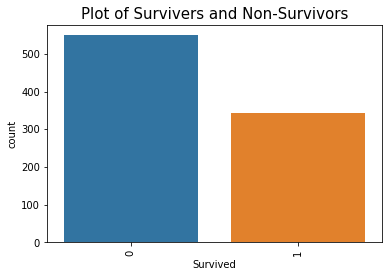

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visuallising the through a Count Plot
sns.countplot(x='Survived', data = df_train) 
plt.title('Plot of Survivers and Non-Survivors', size=15)
plt.xticks(rotation='vertical')
plt.show()

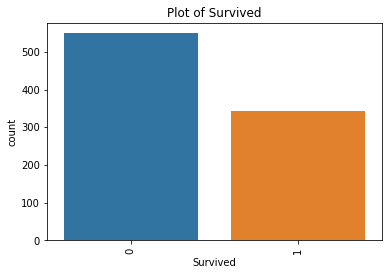

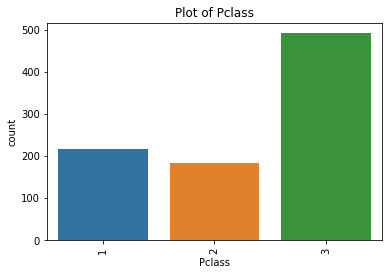

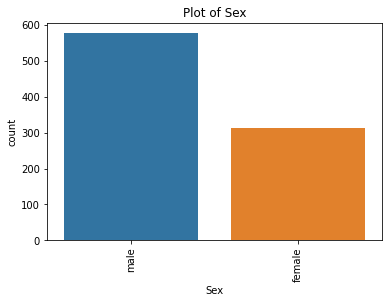

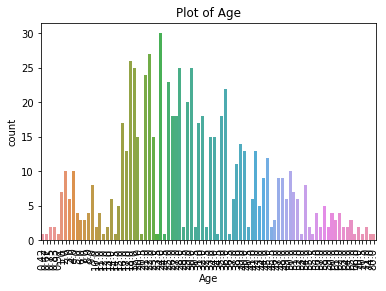

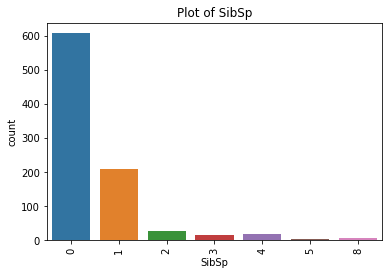

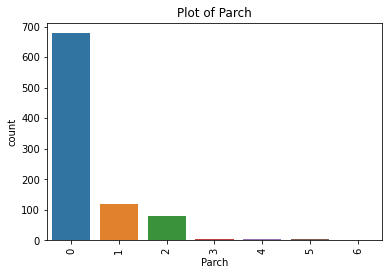

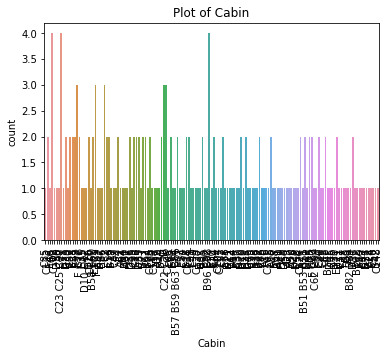

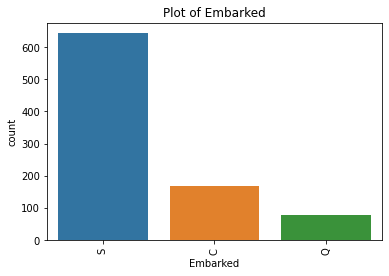

In [31]:
col = df_train[['Survived','Pclass', 'Sex', 'Age', 'SibSp',
             'Parch', 'Cabin', 'Embarked']]

for i in col:
  #visuallising the through a Count Plot
  sns.countplot(x=i, data = df_train)
  plt.title(f'Plot of {i}')
  plt.xticks(rotation='vertical')
  plt.show()


In [43]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [40]:
# Check how many cabin groups are on titanic
df_train.groupby('Cabin').sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0,1,36.0,0,0,40.1250
A14,476,0,1,0.0,0,0,52.0000
A16,557,1,1,48.0,1,0,39.6000
A19,285,0,1,0.0,0,0,26.0000
A20,600,1,1,49.0,1,0,56.9292
...,...,...,...,...,...,...,...
F33,930,3,6,87.0,0,0,34.0000
F38,777,0,3,0.0,0,0,7.7500
F4,803,2,4,5.0,4,2,78.0000


In [44]:
df_train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
C90            1
A5             1
A20            1
D49            1
E34            1
Name: Cabin, Length: 147, dtype: int64

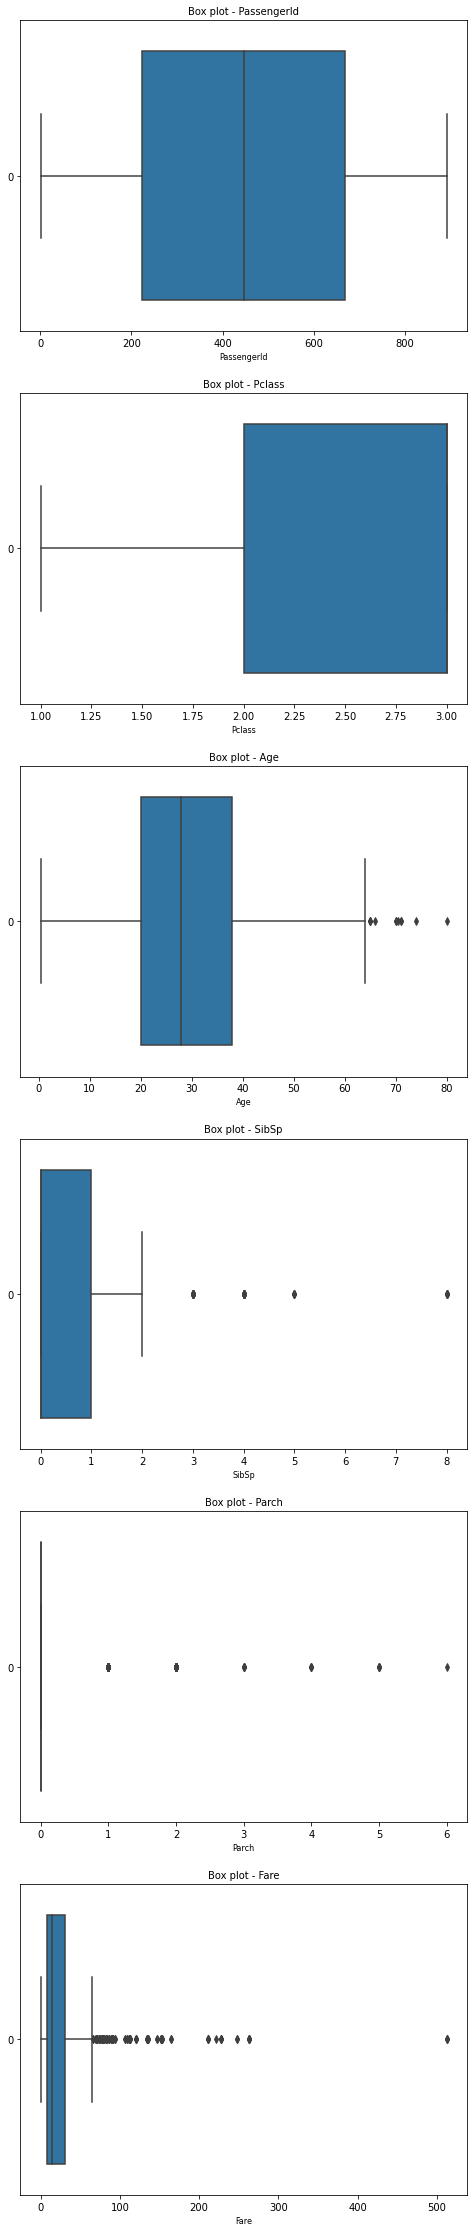

In [63]:
# Check for outliers
# Check for outliers
# Plotting columns with numerical values only to check for outliers
col_names = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = df_train[col_val], ax= ax[i], orient="h")
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

### Check for the Outlier Percentage

In [65]:
# Check for outliers Percentage in the dataset.
# Set the 25th percentile
Quantile_1 = df_train[col_names].quantile(0.25)

# set the 75th percentile
Quantile_3 = df_train[col_names].quantile(0.75)

# calculate the quantile range
IQR = Quantile_3 - Quantile_1

# Determine the outliers
outliers = df_train[col_names][((df_train[col_names] < (Quantile_1 - 1.5 * IQR))
 |(df_train[col_names] > (Quantile_3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(df_train))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (293, 6). Which translates to 32.88439955106622% of the data.


from the above results, it indicates that 293 rows and 6 columns are affected by outliers. We will print out this outliers to have a deeper look into the details

In [66]:
# Check the shape of the dataset and compare with the shape of the outliers found
df_train.shape

(891, 12)

### Check the normality of the dataset to determine which machine learning model that will be applied

In [69]:
# First check the datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Then Check the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

col_names3 = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]]

# Test for normality
stat, p = shapiro(col_names3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')

Statistics=nan, p=1.000
Sample looks Guassian.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [92]:
df_duplicates = df_train[df_train.duplicated(subset=['PassengerId', 'Ticket'], keep=False)]
df_duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [98]:
df_train.groupby(['Survived']).sum()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [127]:
survived_groups = df_train['Survived'].value_counts()
survived_groups


0    549
1    342
Name: Survived, dtype: int64

In [128]:
survived_groups = pd.crosstab(index=df_train["Survived"], columns="count") 

survived_groups



col_0,count
Survived,
0,549
1,342


In [133]:
# Check the unique values in Pclass column
df_train['Pclass'].unique()

array([3, 1, 2])

In [134]:
# Get frequency table of the column using Groupby count()
# Preview Number of Passenger Survival by Age and Ticket Class (Pclass)
df_train.groupby(['Survived', 'Age', 'Pclass'])['Pclass'].count()


Survived  Age   Pclass
0         1.0   3         2
          2.0   1         1
                3         6
          3.0   3         1
          4.0   3         3
                         ..
1         62.0  1         1
                2         1
          63.0  1         1
                3         1
          80.0  1         1
Name: Pclass, Length: 264, dtype: int64

In [151]:
# Preview Number of Passenger Survival by Ticket Class (Pclass)
df_train.groupby(['Survived', 'Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic

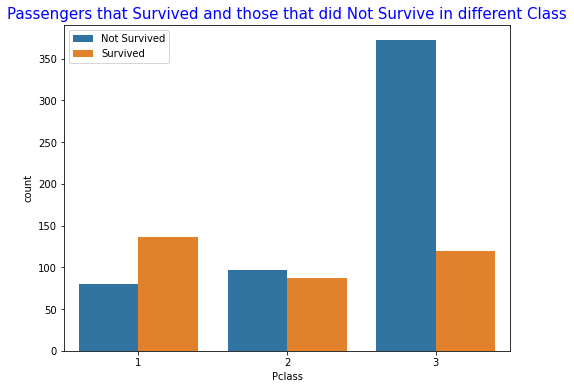

In [168]:
# Passengers that Survived and those that did Not Survive in different Class
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=df_train, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('Passengers that Survived and those that did Not Survive in different Class', fontsize=15, color='blue')
plt.show();

In [152]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [156]:
# Preview Number of Passenger Survival by number of siblings / spouses aboard the Titanic
df_train.groupby(['Survived', 'SibSp'])['Survived'].count()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64

In [158]:
# Preview Number of Passenger Survival by number of parents / children aboard the Titanic.
df_train.groupby(['Survived', 'Parch'])['Survived'].count()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64

In [159]:
# Preview Number of Passenger Survival aboard the Titanic by Sex.
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

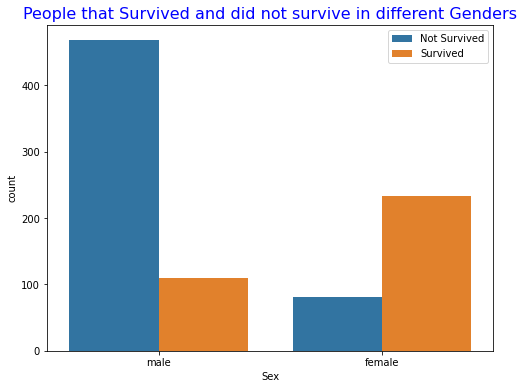

In [172]:
# People that Survived and those did Not Survive in different Genders
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df_train, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived and did not survive in different Genders', fontsize=16, color='blue')
plt.show();

In [160]:
# Preview Number of Passenger Survival aboard the Titanic by Sex.
df_train.groupby(['Survived', 'Age'])['Survived'].count()

Survived  Age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Name: Survived, Length: 142, dtype: int64

### Performing Feature Engineering

In [173]:
# Create a column with age grouped in categories
# but first heck the uniqueness in age
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [176]:
# Check the age of the oldest and youngest passenger aboard titanic
print(f"The oldest passenger in the Titanic was {df_train['Age'].max()} years old.\n")

print(f"The youngest passenger in the Titanic was {df_train['Age'].min()} years old.")

The oldest passenger in the Titanic was 80.0 years old.

The youngest passenger in the Titanic was 0.42 years old.


In [206]:
# Create a new column for the age group. we shall group them as follows
#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4

# First create a copy of the dataframe
df_train_updated = df_train.copy(deep=True)
category = pd.cut(df_train_updated['Age'],bins=[0,9,18,36,61,105],labels=[0,1,2,3,4])
df_train_updated.insert(1,'Age_group',category)
df_train_updated.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [180]:
# Confirm the changes on Age-Group
df_train_updated['Age_group'].unique()

[2, 3, NaN, 0, 1, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

From [Kaggle's](https://www.kaggle.com/c/titanic/data) description “S” is “Southampton”, “C” is “Cherbourg” and “Q” is “Queenstown”. So we will re-map those.

In [207]:
# Re-map “S” as “Southampton”, “C” as “Cherbourg” and “Q” as “Queenstown”. 
df_train_updated['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [208]:
# Create a function that will be used to update the Embarked column
def update_embarked(x):
  if x == "C":
    return "Cherbourg"
  elif x == 'Q':
    return "Queenstown"
  elif x == 'S':
    return "Southampton"
df_train_updated['Embarked'] = df_train_updated['Embarked'].map(update_embarked)


In [209]:
# Confirm Changes on train dataset (sample 5)
df_train_updated.sample(5)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
468,469,NaN,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Queenstown
254,255,3,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,Southampton
646,647,2,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,Southampton
693,694,2,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,Cherbourg
712,713,3,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,Southampton


In [197]:
# Confirm Changes on test dataset (sample 5)
df_test['Embarked'] = df_test['Embarked'].map(update_embarked)
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,Cherbourg
189,1081,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,Southampton
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,Cherbourg
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,Cherbourg
337,1229,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,NaN,Cherbourg


In [210]:
# Check the number of passengers per port of embarkation
df_train_updated['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

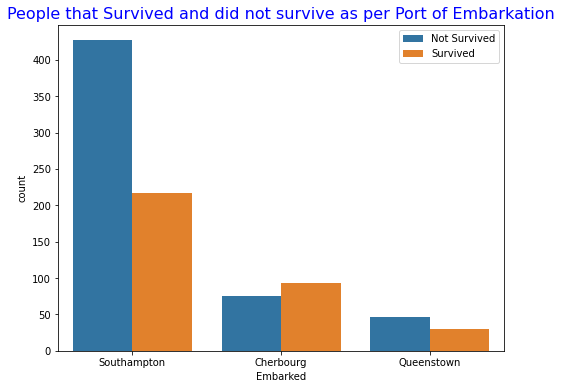

In [212]:
# Check the survivors per port of embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df_train_updated, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived and did not survive as per Port of Embarkation', fontsize=16, color='blue')
plt.show();

According to the Kaggle description:
"sibsp" stands for sibling and spouse. Details are as follows;
> Sibling = Brother, Sister, Stepbrother, Stepsister
> Spouse = Husband, Wife (mistresses and fiancés were ignored)

"parch": The dataset defines family relations in this way...
> Parent = Mother, Father
> Child = Daughter, Son, Stepdaughter, Stepson (Some children travelled only with a nanny, therefore parch=0 for them).

“SibSp” and “Parch” together would make up a “FamilySize” so I will create a new feature for that (Family_Members.

In [217]:
# Preview unique features on the Sibling-spouse (SibSp) columns
df_train_updated['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [218]:
# Preview uniques values on the Parent-child (Parch) column
df_train_updated['Parch'].unique()

# The value 0 is for those children who travelled with the nanny

array([0, 1, 2, 5, 3, 4, 6])

In [214]:
# Create a new column for family members
df_train_updated['Family_Members'] = df_train_updated['SibSp'] + df_train_updated['Parch']

# Create a table for Family members and calculate their averages
df_train_updated.groupby('Family_Members').agg({"Family_Members" : 'count', "Survived" : 'mean'}).sort_index()

,Family_Members,Survived
Family_Members,,
0,537,0.303538
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


In [216]:
# Create a copy of the test dataset
df_test_copy = df_test.copy(deep=True)
df_test_copy['Family_Members'] = df_test_copy['SibSp'] + df_test_copy['Parch']
df_test_copy.sample(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,Southampton,3
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.00,0,0,28004,10.5000,NaN,Southampton,0
230,1122,2,"Sweet, Mr. George Frederick",male,14.00,0,0,220845,65.0000,NaN,Southampton,0
376,1268,3,"Kink, Miss. Maria",female,22.00,2,0,315152,8.6625,NaN,Southampton,2
53,945,1,"Fortune, Miss. Ethel Flora",female,28.00,3,2,19950,263.0000,C23 C25 C27,Southampton,5
64,956,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,Cherbourg,4


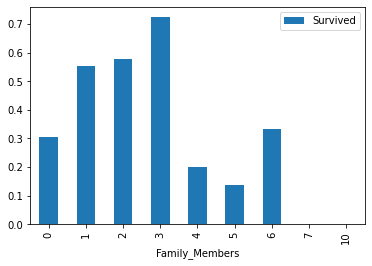

In [224]:
# Number of passenger survived as per the family members
df_train_updated.groupby('Family_Members').agg({"Survived" : 'mean'}).plot(kind='bar');

It is noted that those who were three family members had a higher survival rate, followed by those who were two family members, then 1 and 6.

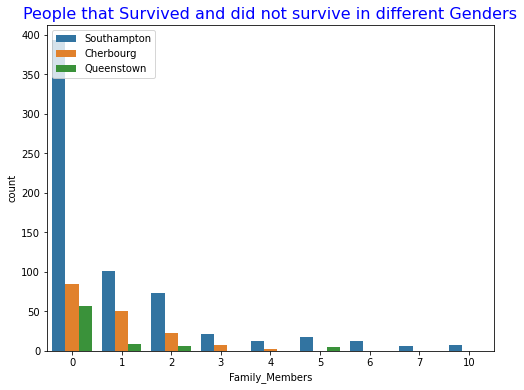

In [236]:
# Family Members per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Family_Members', data=df_train_updated, hue='Embarked')
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

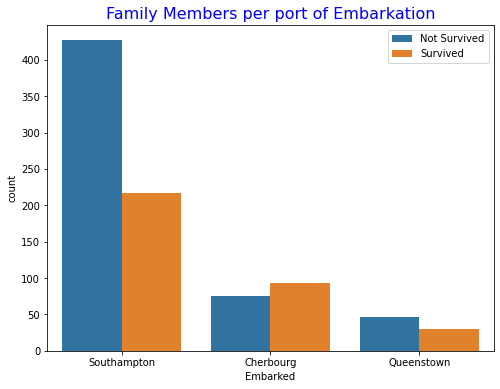

In [241]:
# Number of Survivors per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df_train_updated, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

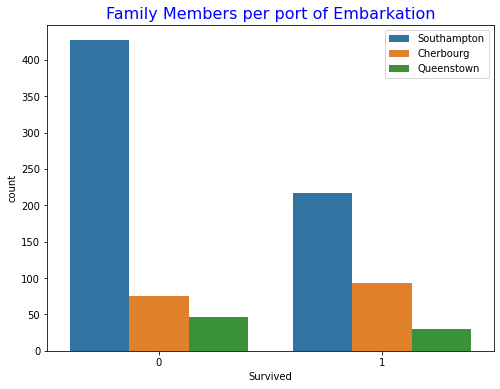

In [240]:
# Number of Survivors per port of Embarkation
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df_train_updated, hue='Embarked')
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Family Members per port of Embarkation', fontsize=16, color='blue')
plt.show();

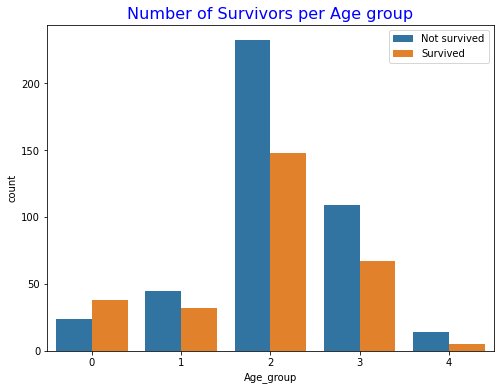

In [242]:
# Number of Survivors per Age group
plt.figure(figsize=(8,6))
sns.countplot(x='Age_group', data=df_train_updated, hue='Survived')
plt.legend(['Not survived', 'Survived'])
plt.title('Number of Survivors per Age group', fontsize=16, color='blue')
plt.show();

#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4

It is evident that the highest number of passengers who didn't survive on board of the titanic was that of the youth followed by adults between the age of 36 and 60. 

We can have a look at the name deatils and see what information was provided and see if it can be useful or we drop the name column.

In [243]:
# Preview the passenger names on the train dataset
df_train_updated['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [244]:
# preview the passenger names on the test dataset
df_test_copy['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

The name details has passenger titles in them. We will try to extract the titles from the passenger names.

In [245]:
# Create the title column on the train dataset
df_train_updated['Title'] = df_train_updated['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_train_updated.head(2)

,PassengerId,Age_group,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,1,2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1,Mr
1,2,3,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,Mrs


In [246]:
# create the Title column on the test dataset
df_test_copy['Title'] = df_test_copy['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_test_copy.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,1,Mrs


In [247]:
# Check the counts per Title
df_train_updated['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Lady              1
Jonkheer          1
Sir               1
the Countess      1
Capt              1
Mme               1
Ms                1
Name: Title, dtype: int64

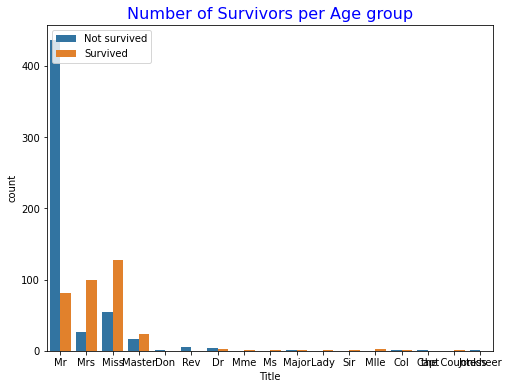

In [250]:
# Number of Survivors per Title
plt.figure(figsize=(8,6))
sns.countplot(x='Title', data=df_train_updated, hue='Survived')
plt.legend(['Not survived', 'Survived'])
plt.title('Number of Survivors per Title', fontsize=16, color='blue')
plt.show();

# Choose a dataset using randon seed

In [ ]:
# Choose a dataset using randon seed
import numpy as np; np.random.seed(42)
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

In [ ]:
# Apply the function on the entire tweet column
df_train['tweet'] = df_train['tweet'].map(lambda x: clean_text(x))